In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, RepeatVector
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd
import re
from keras.callbacks import ModelCheckpoint
from keras.models import load_model, Sequential
from keras import optimizers
import string
from numpy import array, argmax, random, take
import matplotlib  as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 200)

In [ ]:
# from google.colab import drive
# drive.mount('/content/fichier_sans_lignes_vides.csv')

In [ ]:
# !ls "/content/drive/MyDrive/"

In [ ]:
data_path = "/content/fichier_sans_lignes_vides.csv"

In [ ]:
data = pd.read_csv(data_path)

In [ ]:
data.head()

,Français,Lingala
0,"Au commencement, Dieu créa les cieux et la terre.","Na ebandeli, Nzambe akelaki Likolo mpe mokili."
1,"Or la terre était informe et vide, et les ténèbres étaient à la surface de l'abîme, et l'Esprit de Dieu se mouvait sur les eaux.",Mokili ezalaki na lolenge te mpe ezalaki pamba. Molili ezalaki na likolo ya mozindo ; mpe Molimo ya Nzambe azalaki kopepa na likolo ya mayi.
2,Et Dieu dit: Que la lumière soit; et la lumière fut.,Mpe Nzambe alobaki : « Tika ete pole ezala ! » Mpe pole ezalaki.
3,Et Dieu vit que la lumière était bonne; et Dieu sépara la lumière d'avec les ténèbres.,"Nzambe amonaki ete pole ezali malamu, akabolaki pole na molili."
4,"Et Dieu nomma la lumière, jour; et il nomma les ténèbres, nuit. Et il y eut un soir, et il y eut un matin; ce fut le premier jour.","Nzambe abengaki pole « moyi, » mpe abengaki molili « butu. » Pokwa ezalaki mpe tongo ezalaki. Yango ezalaki mokolo moko."


In [ ]:
data.shape

(31170, 2)

In [ ]:
fr_lin = data[:30000]

In [ ]:
fr_lin

,Français,Lingala
0,"Au commencement, Dieu créa les cieux et la terre.","Na ebandeli, Nzambe akelaki Likolo mpe mokili."
1,"Or la terre était informe et vide, et les ténèbres étaient à la surface de l'abîme, et l'Esprit de Dieu se mouvait sur les eaux.",Mokili ezalaki na lolenge te mpe ezalaki pamba. Molili ezalaki na likolo ya mozindo ; mpe Molimo ya Nzambe azalaki kopepa na likolo ya mayi.
2,Et Dieu dit: Que la lumière soit; et la lumière fut.,Mpe Nzambe alobaki : « Tika ete pole ezala ! » Mpe pole ezalaki.
3,Et Dieu vit que la lumière était bonne; et Dieu sépara la lumière d'avec les ténèbres.,"Nzambe amonaki ete pole ezali malamu, akabolaki pole na molili."
4,"Et Dieu nomma la lumière, jour; et il nomma les ténèbres, nuit. Et il y eut un soir, et il y eut un matin; ce fut le premier jour.","Nzambe abengaki pole « moyi, » mpe abengaki molili « butu. » Pokwa ezalaki mpe tongo ezalaki. Yango ezalaki mokolo moko."
...,...,...
29995,"Qu'il a répandu avec richesse sur nous, par Jésus-Christ notre Sauveur;","Nzambe asopelaki biso Molimo Mosantu na bofuluki penza na nzela ya Yesu-Klisto, Mobikisi na biso,"
29996,"Afin que, justifiés par sa grâce, nous fussions héritiers de la vie éternelle selon notre espérance.","mpo ete, wana akomisi biso bato ya sembo na nzela ya ngolu na Ye, tokoma bakitani ya libula kolanda elikya ya bomoi ya seko."
29997,"Cette parole est certaine, et je veux que tu établisses fortement ces choses, afin que ceux qui ont cru en Dieu s'appliquent à pratiquer les bonnes œuvres; voilà les choses qui sont bonnes et util...","Makambo oyo nawuti koloba ezali penza ya solo ; mpe nalingi ete obetelaka yango sete makasi, mpo ete bato oyo bandimeli Nzambe bamipesa mobimba mpo na kosala misala ya malamu. Yango nde makambo oy..."
29998,"Mais évite les questions folles, les généalogies, les contestations et les disputes touchant la loi; car elles sont inutiles et vaines.","Kasi kima tembe ya bozoba, masolo ya milongo ya mbotama, koswana mpe bitumba na tina na mibeko : ezali na litomba te mpe ezali na tina te."


# Data cleaning

In [ ]:
fr_lin.iloc[:,0]

0                                                                                                                                                              Au commencement, Dieu créa les cieux et la terre.
1                                                                               Or la terre était informe et vide, et les ténèbres étaient à la surface de l'abîme, et l'Esprit de Dieu se mouvait sur les eaux.
2                                                                                                                                                           Et Dieu dit: Que la lumière soit; et la lumière fut.
3                                                                                                                         Et Dieu vit que la lumière était bonne; et Dieu sépara la lumière d'avec les ténèbres.
4                                                                             Et Dieu nomma la lumière, jour; et il nomma les ténèbres, nuit. Et il y eut un soir, e

In [ ]:
fr_lin.iloc[:,1]

0                                                                                                                                                                 Na ebandeli, Nzambe akelaki Likolo mpe mokili.
1                                                                   Mokili ezalaki na lolenge te mpe ezalaki pamba. Molili ezalaki na likolo ya mozindo ; mpe Molimo ya Nzambe azalaki kopepa na likolo ya mayi.
2                                                                                                                                               Mpe Nzambe alobaki : « Tika ete pole ezala ! » Mpe pole ezalaki.
3                                                                                                                                                Nzambe amonaki ete pole ezali malamu, akabolaki pole na molili.
4                                                                                       Nzambe abengaki pole « moyi, » mpe abengaki molili « butu. » Pokwa ezalaki m

In [ ]:
fr_lin = fr_lin.astype(str)

In [ ]:
fr_lin.iloc[:,0] = [s.translate(str.maketrans('', '', string.punctuation)) for s in fr_lin.iloc[:,0]]
fr_lin.iloc[:,1] = [s.translate(str.maketrans('', '', string.punctuation)) for s in fr_lin.iloc[:,1]]

In [ ]:
# corpus_fr = []
# for fr_li in fr_lin:
#   fr_li = str(fr_li).split('nan')[0]
#   fr_li = fr_li.lower()
#   fr_li = re.sub(r'[^a-zA-Z0-9\s]', '', fr_li)  # Supprime les caractères spéciaux
#   fr_li = re.sub(r'\s+', ' ', fr_li)  # Supprime les espaces multiples
#   fr_li = fr_li.strip()  # Supprime les espaces en début et fin de phrase
#   if fr_li:
#     corpus_fr.append(fr_li)

In [ ]:
fr_lin[:5]

,Français,Lingala
0,Au commencement Dieu créa les cieux et la terre,Na ebandeli Nzambe akelaki Likolo mpe mokili
1,Or la terre était informe et vide et les ténèbres étaient à la surface de labîme et lEsprit de Dieu se mouvait sur les eaux,Mokili ezalaki na lolenge te mpe ezalaki pamba Molili ezalaki na likolo ya mozindo mpe Molimo ya Nzambe azalaki kopepa na likolo ya mayi
2,Et Dieu dit Que la lumière soit et la lumière fut,Mpe Nzambe alobaki « Tika ete pole ezala » Mpe pole ezalaki
3,Et Dieu vit que la lumière était bonne et Dieu sépara la lumière davec les ténèbres,Nzambe amonaki ete pole ezali malamu akabolaki pole na molili
4,Et Dieu nomma la lumière jour et il nomma les ténèbres nuit Et il y eut un soir et il y eut un matin ce fut le premier jour,Nzambe abengaki pole « moyi » mpe abengaki molili « butu » Pokwa ezalaki mpe tongo ezalaki Yango ezalaki mokolo moko


In [ ]:
# fr_lin = fr_lin.astype(str)

for i in range(len(fr_lin)):
  fr_lin.iloc[i,0] = fr_lin.iloc[i,0].lower()
  fr_lin.iloc[i,1] = fr_lin.iloc[i,1].lower()

fr_lin

,Français,Lingala
0,au commencement dieu créa les cieux et la terre,na ebandeli nzambe akelaki likolo mpe mokili
1,or la terre était informe et vide et les ténèbres étaient à la surface de labîme et lesprit de dieu se mouvait sur les eaux,mokili ezalaki na lolenge te mpe ezalaki pamba molili ezalaki na likolo ya mozindo mpe molimo ya nzambe azalaki kopepa na likolo ya mayi
2,et dieu dit que la lumière soit et la lumière fut,mpe nzambe alobaki « tika ete pole ezala » mpe pole ezalaki
3,et dieu vit que la lumière était bonne et dieu sépara la lumière davec les ténèbres,nzambe amonaki ete pole ezali malamu akabolaki pole na molili
4,et dieu nomma la lumière jour et il nomma les ténèbres nuit et il y eut un soir et il y eut un matin ce fut le premier jour,nzambe abengaki pole « moyi » mpe abengaki molili « butu » pokwa ezalaki mpe tongo ezalaki yango ezalaki mokolo moko
...,...,...
29995,quil a répandu avec richesse sur nous par jésuschrist notre sauveur,nzambe asopelaki biso molimo mosantu na bofuluki penza na nzela ya yesuklisto mobikisi na biso
29996,afin que justifiés par sa grâce nous fussions héritiers de la vie éternelle selon notre espérance,mpo ete wana akomisi biso bato ya sembo na nzela ya ngolu na ye tokoma bakitani ya libula kolanda elikya ya bomoi ya seko
29997,cette parole est certaine et je veux que tu établisses fortement ces choses afin que ceux qui ont cru en dieu sappliquent à pratiquer les bonnes œuvres voilà les choses qui sont bonnes et utiles a...,makambo oyo nawuti koloba ezali penza ya solo mpe nalingi ete obetelaka yango sete makasi mpo ete bato oyo bandimeli nzambe bamipesa mobimba mpo na kosala misala ya malamu yango nde makambo oyo e...
29998,mais évite les questions folles les généalogies les contestations et les disputes touchant la loi car elles sont inutiles et vaines,kasi kima tembe ya bozoba masolo ya milongo ya mbotama koswana mpe bitumba na tina na mibeko ezali na litomba te mpe ezali na tina te


# Text to sequence conversion (word to index mapping)

1. convert setences into numbers
2. every sentence should be of same length

In [ ]:
# Function to build a tokenizer
def tokenization(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [ ]:
# prepare french tokenizer
fr_tokenizer = tokenization(fr_lin.iloc[:,0])
fr_vocab_size = len(fr_tokenizer.word_index) + 1

fr_length = 10
print(f"french vocab size : {fr_vocab_size}")

french vocab size : 24889


In [ ]:
# prepare lingala tokenizer
lin_tokenizer = tokenization(fr_lin.iloc[:,1])
lin_vocab_size = len(lin_tokenizer.word_index) + 1

lin_length = 10
print(f"lingala vocab size : {lin_vocab_size}")

lingala vocab size : 18845


In [ ]:
# encode and pad sequences, padding to a maximum setence length as mentionnd above
def encode_sequences(tokenizer, length, lines):
  # integer encode sequences
  seq = tokenizer.texts_to_sequences(lines)
  # pad sequences with 0 values
  seq = pad_sequences(seq, maxlen=length, padding="post")
  return seq

it's time to encode sequences. we will encode french setences as the input sequences and english sentences as the target sequences. this has to be  done for both train and test datasets.

In [ ]:
from sklearn.model_selection import train_test_split

# split data into train  and test  set
train, test = train_test_split(fr_lin, test_size=0.2, random_state=12)

In [ ]:
# prepare training data
trainX = encode_sequences(fr_tokenizer, fr_length, train.iloc[:,1])
trainY = encode_sequences(lin_tokenizer, lin_length, train.iloc[:,0])

In [ ]:
# prepare test data

testX = encode_sequences(fr_tokenizer, fr_length, test.iloc[:,1])
testY = encode_sequences(lin_tokenizer, lin_length, test.iloc[:,0])

# Define our Seq2Seq model architecture:

In [ ]:
# def define_model(in_vocab, out_vocab, in_timesteps, out_timesteps, units):
#   model= Sequential()
#   model.add(Embedding(in_vocab, units, inputs=in_timesteps, mask_zero=True))
#   model.add(LSTM(units))
#   model.add(RepeatVector(out_timesteps))
#   model.add(LSTM(units, return_sequences=True))
#   model.add(Dense(out_vocab, activation='softmax'))
#   return model

# def define_model(in_vocab, out_vocab, in_timesteps, out_timesteps, units):
#     model = Sequential()
#     model.add(layers.Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
#     model.add(layers.LSTM(units))
#     model.add(layers.RepeatVector(out_timesteps))
#     model.add(layers.LSTM(units, return_sequences=True))
#     model.add(layers.Dense(out_vocab, activation='softmax'))
#     return

# def define_model(in_vocab, out_vocab, in_timesteps, out_timesteps, units):
#     model = Sequential()
#     model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
#     model.add(LSTM(units))
#     model.add(RepeatVector(out_timesteps))
#     model.add(LSTM(units, return_sequences=True))
#     model.add(Dense(out_vocab, activation='softmax'))
#     return model

from keras.layers import Attention

def define_model(in_vocab, out_vocab, in_timesteps, out_timesteps, units):
    model = Sequential()
    model.add(Embedding(in_vocab, units, input_length=in_timesteps, mask_zero=True))
    encoder = LSTM(units, return_sequences=True, return_state=True)
    _, state_h, state_c = encoder(model.output)

    # Add the attention layer
    attention = Attention()
    context = attention([model.output, state_h, state_c])

    decoder = LSTM(units, return_sequences=True)
    output = decoder(context)
    output = Dense(out_vocab, activation='softmax')(output)

    model = Model(model.input, output)
    return model

In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
# model compilation

# model = define_model(fr_vocab_size, lin_vocab_size, fr_length, lin_length, 512)
# model = define_model(fr_vocab_size, lin_vocab_size, fr_length, lin_length, 512)

model = define_model(fr_vocab_size, lin_vocab_size, fr_length, lin_length, 512)

In [ ]:
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=rms, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=rms, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 embedding_input (InputLaye  [(None, 10)]                 0         []                            
 r)                                                                                               
                                                                                                  
 embedding (Embedding)       (None, 10, 512)              1274316   ['embedding_input[0][0]']     
                                                          8                                       
                                                                                                  
 lstm (LSTM)                 [(None, 10, 512),            2099200   ['embedding[0][0]']           
                              (None, 512),                                                    

In [ ]:
h = model.fit(trainX, trainY.reshape(trainY.shape[0], trainY.shape[1], 1), epochs=10, batch_size=512, validation_split=0.2)

Epoch 1/10
38/38 [==============================] - 24s 331ms/step - loss: 2.5946 - accuracy: 0.8839 - val_loss: 0.5084 - val_accuracy: 0.9041
Epoch 2/10
38/38 [==============================] - 9s 247ms/step - loss: 0.4760 - accuracy: 0.9087 - val_loss: 0.5051 - val_accuracy: 0.9041
Epoch 3/10
38/38 [==============================] - 9s 231ms/step - loss: 0.4605 - accuracy: 0.9087 - val_loss: 0.4759 - val_accuracy: 0.9041
Epoch 4/10
38/38 [==============================] - 9s 243ms/step - loss: 0.4537 - accuracy: 0.9087 - val_loss: 0.4737 - val_accuracy: 0.9041
Epoch 5/10
38/38 [==============================] - 9s 247ms/step - loss: 0.4504 - accuracy: 0.9087 - val_loss: 0.4678 - val_accuracy: 0.9041
Epoch 6/10
38/38 [==============================] - 10s 254ms/step - loss: 0.4483 - accuracy: 0.9087 - val_loss: 0.4849 - val_accuracy: 0.9041
Epoch 7/10
38/38 [==============================] - 9s 228ms/step - loss: 0.4459 - accuracy: 0.9087 - val_loss: 0.4679 - val_accuracy: 0.9041
Epoc

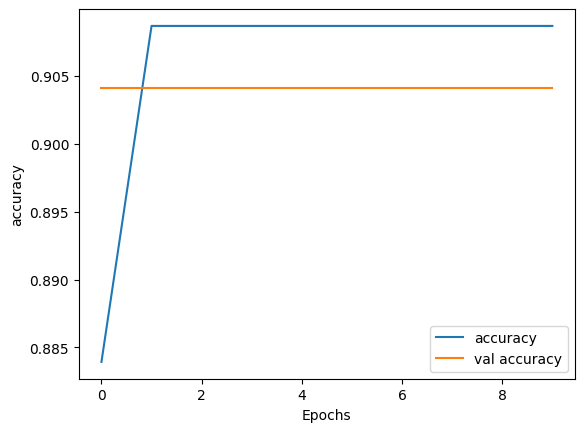

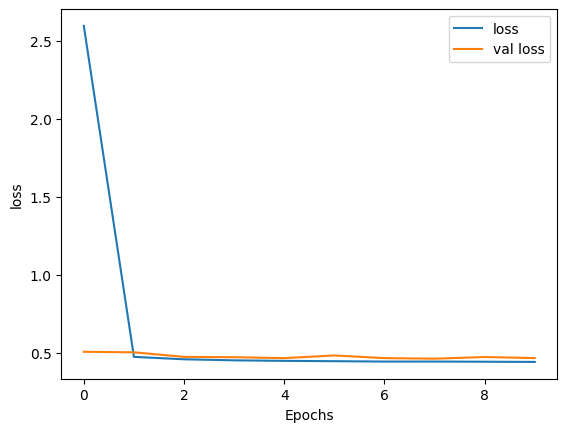

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val '+string])
    plt.show()

plot_graphs(h, 'accuracy')
plot_graphs(h, 'loss')

In [ ]:
# from tensorflow.keras.models import Sequential

In [ ]:
# print(type(model))

In [ ]:
# if type(model) == "Sequential":
#     preds = model.predict(testX)
# elif type(model) == "Model":
#     preds = model.predict_classes(testX)
# else:
#     raise ValueError(f"Unsupported model type: {type(model)}")

In [ ]:
len(testX), len(testY)

(6000, 6000)

In [ ]:
# preds = model.predict_classes(testX.reshape((testX.shape[0],testX.shape[1])))
# preds = model.predict(testX.reshape((testX.shape[0],testX.shape[1]))).argmax(axis=-1)
# preds = model.predict(testX.reshape((testX.shape[0],testX.shape[1]))).argmax(axis=0)

# these prediction are sequences of integers, we need to convert these integers to their corresponding words.

# Make a prediction
# y_pred = testX.reshape((testX.shape[0], testX.shape[1], 1))

# Get the predicted class labels
# preds = y_pred.argmax(axis=-1)
# preds = model.predict(y_pred)

preds = model.predict(testX.reshape((testX.shape[0], testX.shape[1])))
predicted_classes = preds.argmax(axis=-1)
print(predicted_classes)

188/188 [==============================] - 4s 21ms/step


In [ ]:
preds

NameError: name 'predicted_classe' is not defined

In [ ]:
# these prediction are sequences of integers, we need to convert these integers to their corresponding words.

# def get_word(n, tokenizer):
#   for word, index in tokenizer.word_index.items():
#     if index == n:
#       return word
#   return None

def get_word(n, tokenizer):
  if len(n.shape) > 1:
    n = np.argmax(n)
  for word, index in tokenizer.word_index.items():
    if index == n:
      return word
  return None

In [ ]:
# Convert prediction into setences (ling)

In [ ]:
# preds_text = []
# for i in preds:
#   temp = []
#   for j in range(len(i)):
#     t = get_word(i[j], lin_tokenizer)
#     if j > 0:
#       if(t == get_word(i[j-1], lin_tokenizer)) or (t == None):
#         temp.append('')
#       else:
#         temp.append(t)
#     else:
#       if(t == None):
#         temp.append('')
#       else:
#         temp.append(t)
#   preds_text.append(' '.join(temp))


In [ ]:
# preds_text = []
# for i in preds:
#   temp = []
#   for j in range(len(i)):
#     t = get_word(i[j][0], lin_tokenizer)
#     if j > 0:
#       if(t == get_word(i[j-1][0], lin_tokenizer)) or (t == None):
#         temp.append('')
#       else:
#         temp.append(t)
#     else:
#       if(t == None):
#         temp.append('')
#       else:
#         temp.append(t)
#   preds_text.append(' '.join(temp))

preds_text = []
for i in preds:
  temp = []
  for j in range(len(i)):
    t = get_word(i[j], fr_tokenizer)
    if j > 0:
      if(t == get_word(i[j-1], fr_tokenizer)) or (t == None):
        temp.append('')
      else:
        temp.append(t)
    else:
      if(t == None):
        temp.append('')
      else:
        temp.append(t)
  preds_text.append(' '.join(temp))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# let put the origin lingala sentences  in the test dataset and the predicted sentences in a dataframe:

In [ ]:
preds_text

In [ ]:
# pred_df = pd.DataFrame({'actual' : test.iloc[:,1], 'prediction' : preds_text})
pred_df = pd.DataFrame({'actual' : test.iloc[:len(preds_text),1], 'prediction' : preds_text})

In [ ]:
pred_df.sample(5)

In [ ]:
fr_lin.iloc[3851]